what we do in perceptron  to get the line

    if a point is not perfectly classified will update our line

it is not enough to get a perfect line

we want a perfect fit line which we are not getting from perceptron trick what we require is

    1- points which are perfectly fit also affect the line they push they line away from them

        points which are closer push more and points which are are far push less

    2- points which are not perfectly fit also affect the line they pull they line towards them

        points which are more far pull more and points which are close pull less

the above requirements can be achived using sigmoid function

    sigmoid function = 1/(1+e**(-z))   here in place of z we provide y_hat

    graph of sigmoid function 

<img src="https://www.researchgate.net/profile/Muhammad-Farrukh-5/publication/338580890/figure/fig3/AS:847253531021312@1579012391039/Graph-for-Sigmoid-Function.ppm" />

sigmoid function can also be seen as probability function

    when y_hat=0 sigmoid(0)=0.5 or probability(event)=0.5

eg
    Suppose you're predicting whether a student will pass an exam based on the number of hours studied:
    
    Let’s say we have:

        z=2×(hours studied)−5

    | Hours Studied | z = 2x - 5 | Sigmoid(z) = Probability of Passing |
    | ------------- | ----------- | ----------------------------------- |
    | 0             | -5          | $\approx 0.0067$ (\~0.7%)           |
    | 2.5           | 0           | $0.5$ (50%)                         |
    | 4             | 3           | $\approx 0.95$ (95%)                |
    | 5             | 5           | $\approx 0.993$ (99.3%)             |


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [39]:
X,y=make_classification(n_samples=100,n_features=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,random_state=42,class_sep=5)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

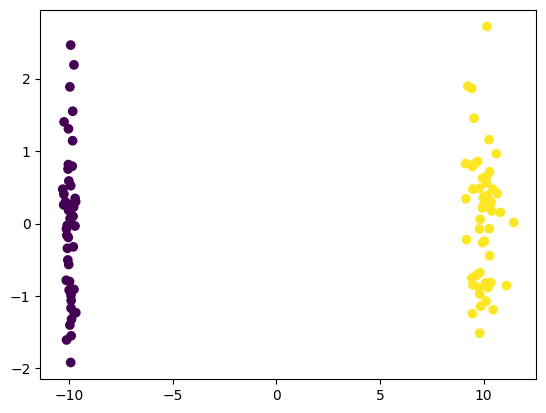

In [38]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
class PerceptronSigmoid:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.weights=None

    def activateSigmoid(self,i):
        return 1/(1+np.exp(i))

    def activate(self,i):
        return 1 if i>0.5 else 0
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        self.weights=np.ones(X.shape[1])
        
        for i in range(self.epochs):
            i=np.random.randint(0,len(X))
            y_hat=self.activateSigmoid(X[i].T@self.weights)
            self.weights=self.weights+self.lr*X[i]*(y[i]-y_hat)
        return self.weights
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        return [ self.activate(i)  for i in X @ self.weights ]

In [33]:
class Perceptron:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.weights=None

    def activate(self,i):
        
        return 1 if i>0 else 0
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        self.weights=np.ones(X.shape[1])
        
        for i in range(self.epochs):
            i=np.random.randint(0,len(X))
            y_hat=self.activate(X[i].T@self.weights)
            self.weights=self.weights+self.lr*X[i]*(y[i]-y_hat)
        return self.weights
    def predict(self,X):
        X=np.insert(X,0,1,axis=1)
        return [ self.activate(i)  for i in X @ self.weights ]

In [34]:
pr=PerceptronSigmoid(0.01,1000)
wts=pr.fit(X_train,y_train)
y_pred=pr.predict(X_test)

C:\Users\panka\AppData\Local\Temp\ipykernel_28352\2429539921.py:8: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(i))


In [35]:
# olderone for comp
pr=Perceptron(0.01,1000)
wts2=pr.fit(X_train,y_train)
y_pred2=pr.predict(X_test)

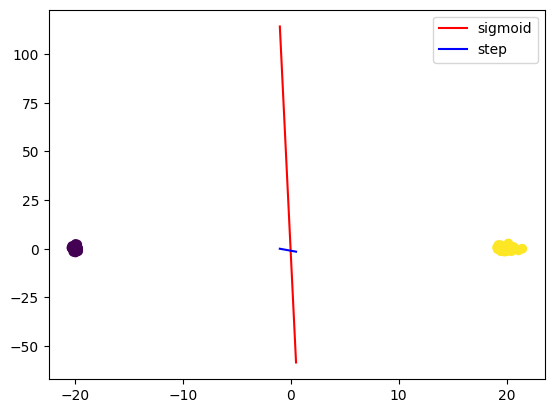

In [36]:
x=np.linspace(-1,0.5,100)

# w0+w1x+w2y=0

coef=-wts[1]/wts[2]
intercept=-wts[0]/wts[2]
coef2=-wts2[1]/wts2[2]
intercept2=-wts2[0]/wts2[2]
plt.plot(x,x * coef +intercept,"r-",label="sigmoid")
plt.plot(x,x * coef2 +intercept2,"b-",label="step")
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.legend()